In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Nifty 50 Historical Data - Cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'])

df['Daily_Return'] = df['Price'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
df.loc[df.index[0], 'Cumulative_Return'] = 1


### Create rolling features

In [4]:
df['Rolling_Return_90D'] = (
    df['Price'].pct_change(90)
)

df['Rolling_Vol_90D'] = (
    df['Daily_Return']
    .rolling(90)
    .std()
    * np.sqrt(252)
)


### Define Market Regimes

In [7]:
def classify_regime(row):
    if row['Rolling_Return_90D'] > 0.10:
        return 'Bull'
    elif row['Rolling_Return_90D'] < -0.10:
        return 'Bear'
    else:
        return 'Sideways'

df['Market_Regime'] = df.apply(classify_regime, axis=1)

### Regime Distribution

In [10]:
df['Market_Regime'].value_counts()

Market_Regime
Sideways    1696
Bull         683
Bear          98
Name: count, dtype: int64

### Regime-wise Performance

In [13]:
regime_stats = df.groupby('Market_Regime').agg(
    Avg_Daily_Return=('Daily_Return', 'mean'),
    Volatility=('Daily_Return', lambda x: x.std() * np.sqrt(252)),
    Observations=('Daily_Return', 'count')
)

regime_stats

,Avg_Daily_Return,Volatility,Observations
Market_Regime,,,
Bear,-0.001232,0.467374,98
Bull,0.001339,0.128690,683
Sideways,0.000324,0.137175,1695


### Visualize Market Regimes on Index

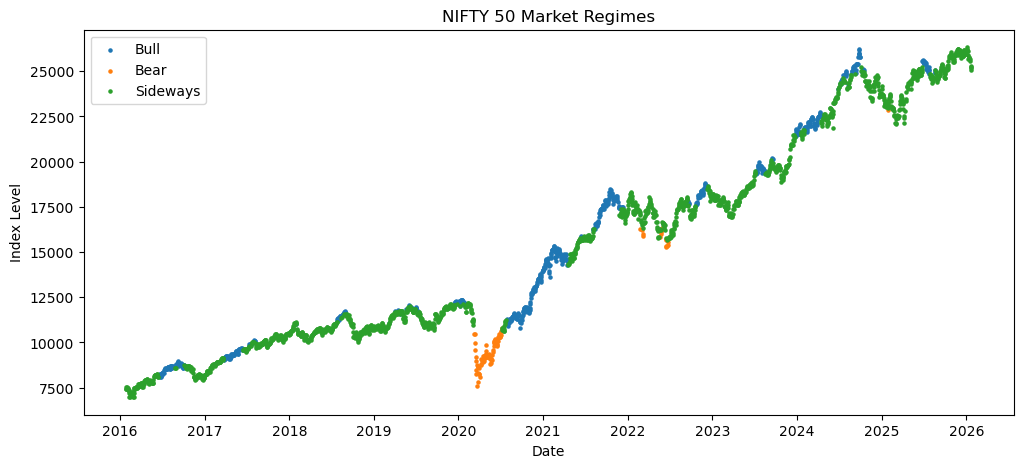

In [16]:
plt.figure(figsize=(12,5))

for regime, color in zip(
    ['Bull', 'Bear', 'Sideways'],
    ['green', 'red', 'gray']
):
    subset = df[df['Market_Regime'] == regime]
    plt.scatter(
        subset['Date'],
        subset['Price'],
        label=regime,
        s=5
    )

plt.title('NIFTY 50 Market Regimes')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.legend()
plt.show()